# Домашнє завдання №9. Підбір гіперпараметрів
Cтворення нейронної мережі за допомогою механізмів Keras, яка буде класифікувати товари із датасету fashion_mnist з точністю не менше 91%

### 1. Завантаження і підготовка даних

In [38]:
from tensorflow import keras


In [92]:
from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential  # клас, який дозволяє створювати моделі шар за шаром

from keras.layers import Dense  # клас, який створює повнозв'язкові шари

from keras import utils  # утиліти для переведення даних в підходячий для keras формат

In [40]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [41]:
# Проаналізуємо форму тренувальних даних
print(x_train[0].shape)

(28, 28)


In [42]:
# Оскільки повнозв'язкова нейромережа не може працювати з двовимірним масивом,
# його необхідно переформатувати в одновимірний вектор

import numpy as np
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

In [43]:
x_train.shape

(60000, 784)

В датасеті fashion_mnist правильні відповіді містять номер класу зображення. Нейромережа видаватиме 10 значень (по кількості вихідних нейронів) з вирогідностями приналежності одягу до певного класу. Тому нам необхідно перетворити представлення правильних відповідей з номерів класів (від 0 до 9) у one-hot-encoding формат.

In [44]:
# Перетворимо мітки в категорії (one-hot-encoding)
y_train = utils.to_categorical(y_train, num_classes=10)

In [45]:
y_train.shape

(60000, 10)

### 2. Підбір гіперпараметрів для різних архітектур нейромережі

#### Модель №1. Базова архітектура

В якості першого варіанту побудуємо повнозв'язкову (всі нейрони одного шару пов'язані зі всіма нейронами наступного шуру) нейромережу з двох шарів:
- вхідний шар з 50 нейронів;
- вихідний шар з 10 нейронів.

Кількість нейронів на вхідному шарі можна міняти, але кількість нейронів виходного шару має дорівнювати кількості міток.

Кожний вихідний нейрон видаватиме вирогідність (від 0 до 1) конкретного предмету одягу.

In [46]:
# створюємо послідовну модель
model1 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model1.add(Dense(50, input_dim=784, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model1.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [47]:
# виведемо параметри моделі
print(model1.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 50)                39250     
                                                                 
 dense_29 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [48]:
history = model1.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
264/264 [==============================] - 1s 3ms/step - loss: 1.3751 - accuracy: 0.5930 - val_loss: 0.9484 - val_accuracy: 0.6911
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.8480 - accuracy: 0.7254 - val_loss: 0.7639 - val_accuracy: 0.7485
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.7243 - accuracy: 0.7646 - val_loss: 0.6828 - val_accuracy: 0.7736
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.7851 - val_loss: 0.6348 - val_accuracy: 0.7876
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.6190 - accuracy: 0.7985 - val_loss: 0.6029 - val_accuracy: 0.7976
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.8059 - val_loss: 0.5788 - val_accuracy: 0.8047
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.8125 - val_loss: 0.5602 - val_accuracy: 0.8086

In [49]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


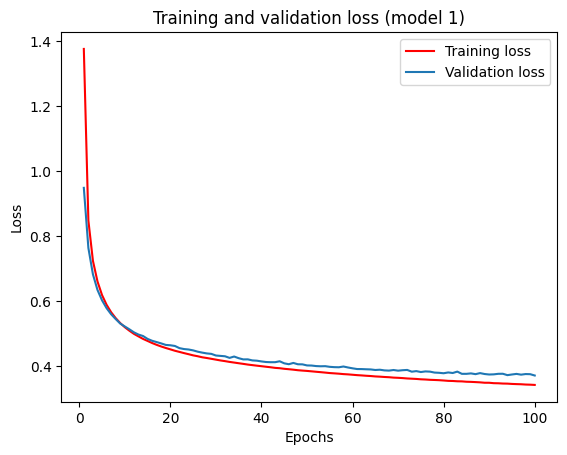

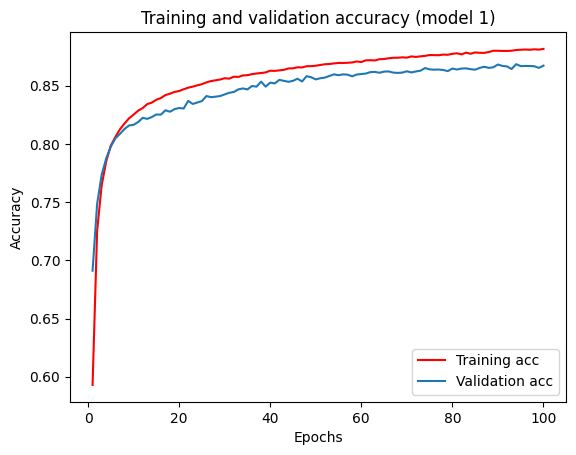

In [50]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Бачимо, що для моделі №1 в процесі навчання на тренувальному наборі ф-я втрат спадає, а точність зростає. Але точність недостатня (менше 0.91). Модель можна покращити.

#### Модель №2. Додатковий шар нейронів

В другому варіанті додамо до нейромережі ще один шар з 50 нейронів.


In [51]:
# створюємо послідовну модель
model2 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model2.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [52]:
# виведемо параметри моделі
print(model2.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                39250     
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 dense_32 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [53]:
history = model2.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
264/264 [==============================] - 1s 3ms/step - loss: 1.5538 - accuracy: 0.5565 - val_loss: 0.9861 - val_accuracy: 0.6914
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.8450 - accuracy: 0.7234 - val_loss: 0.7464 - val_accuracy: 0.7460
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 0.6986 - accuracy: 0.7701 - val_loss: 0.6569 - val_accuracy: 0.7782
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 0.6296 - accuracy: 0.7905 - val_loss: 0.6054 - val_accuracy: 0.7954
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.8047 - val_loss: 0.5746 - val_accuracy: 0.8036
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.8110 - val_loss: 0.5563 - val_accuracy: 0.8082
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.8174 - val_loss: 0.5381 - val_accuracy: 0.8131

In [54]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


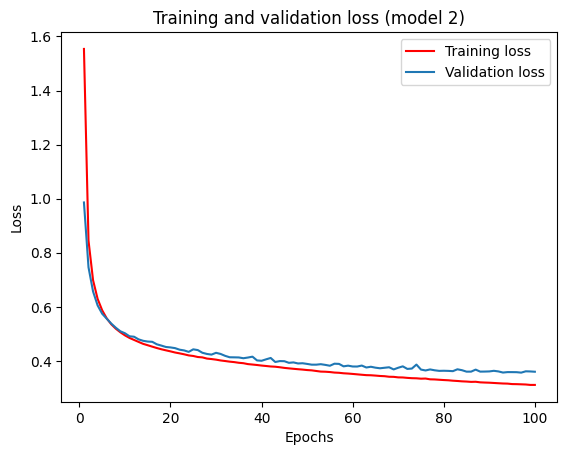

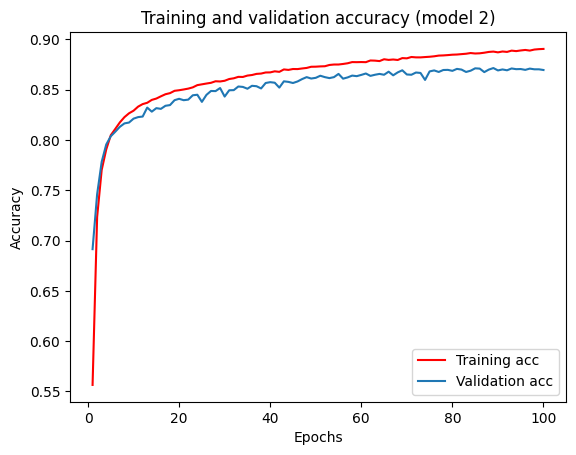

In [55]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №2 складніша за модель №1 (додано шар), точність дещо вища, але токож маємо недонавчання. В моделі №3 будемо відштовхуватися від моделі №2.

#### Модель №3. Збільшення кількості нейронів

В третьому варіанті беремо за основу модель №2. Спробуємо збільшити кількість нейронів на внутрішньому шарі до 100.


In [56]:
# створюємо послідовну модель
model3 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(100, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model3.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [57]:
# виведемо параметри моделі
print(model3.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                39250     
                                                                 
 dense_34 (Dense)            (None, 100)               5100      
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45360 (177.19 KB)
Trainable params: 45360 (177.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [58]:
history = model3.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
264/264 [==============================] - 1s 3ms/step - loss: 1.5228 - accuracy: 0.5519 - val_loss: 0.9760 - val_accuracy: 0.6733
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.8504 - accuracy: 0.7055 - val_loss: 0.7545 - val_accuracy: 0.7362
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.7143 - accuracy: 0.7560 - val_loss: 0.6725 - val_accuracy: 0.7700
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.6450 - accuracy: 0.7821 - val_loss: 0.6210 - val_accuracy: 0.7858
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5995 - accuracy: 0.7987 - val_loss: 0.5871 - val_accuracy: 0.8003
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.8071 - val_loss: 0.5602 - val_accuracy: 0.8065
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.8151 - val_loss: 0.5448 - val_accuracy: 0.8129

In [59]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


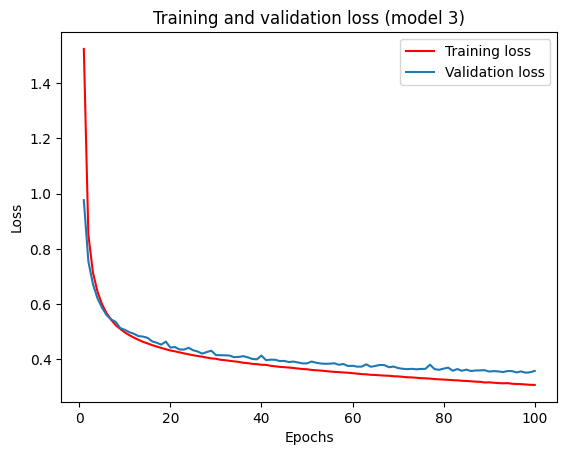

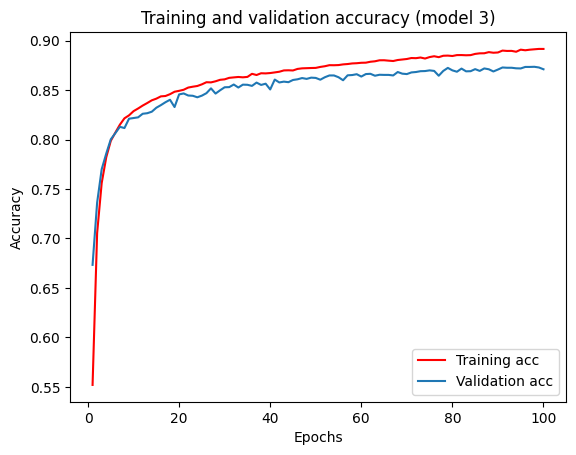

In [60]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №3 складніша за модель №2 (більше нейронів), при цьому точність не стала вище. Тому в моделі №4 будемо відштовхуватися від моделі №2.

#### Модель №4. Зміна функцій активації

В четвертому варіанті беремо за основу модель №2. Спробуємо замінити функції активації 'relu' на 'leaky_relu'.


In [61]:
# створюємо послідовну модель
model4 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model4.add(Dense(50, input_dim=784, activation='leaky_relu'))
model4.add(Dense(50, activation='leaky_relu'))
# input_dim=784 - кількість входів в кожний нейрон
model4.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model4.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [62]:
# виведемо параметри моделі
print(model4.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 50)                39250     
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 dense_38 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [63]:
history = model4.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
264/264 [==============================] - 1s 4ms/step - loss: 1.5411 - accuracy: 0.5259 - val_loss: 1.0140 - val_accuracy: 0.6983
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 0.8712 - accuracy: 0.7243 - val_loss: 0.7612 - val_accuracy: 0.7471
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.7128 - accuracy: 0.7663 - val_loss: 0.6650 - val_accuracy: 0.7814
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.7892 - val_loss: 0.6136 - val_accuracy: 0.7865
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.5889 - accuracy: 0.8025 - val_loss: 0.5754 - val_accuracy: 0.8019
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.8117 - val_loss: 0.5495 - val_accuracy: 0.8110
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.8179 - val_loss: 0.5294 - val_accuracy: 0.8161

In [64]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


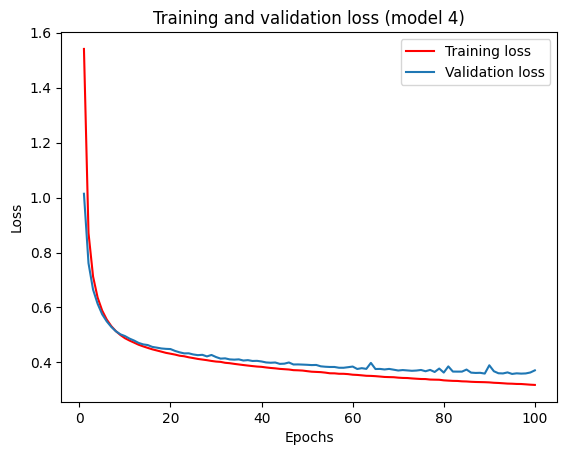

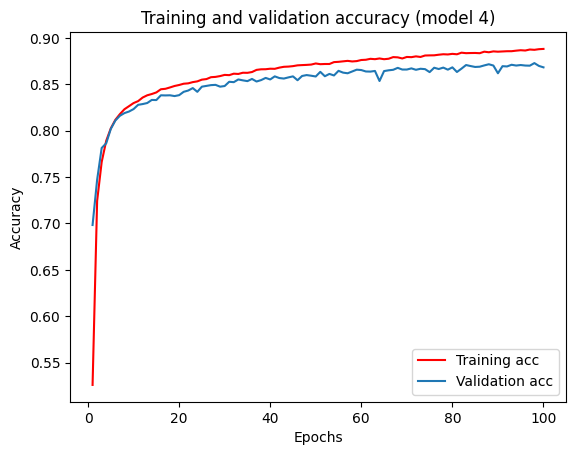

In [65]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №4 не досягає мінімальної точності.

#### Модель №5. Збільшуємо кількість епох

Використовуємо за основу модель №2. Збільшемо кількість епох до 200

In [66]:
# створюємо послідовну модель
model5 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model5.add(Dense(50, input_dim=784, activation='relu'))
model5.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model5.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [67]:
# виведемо параметри моделі
print(model5.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 50)                39250     
                                                                 
 dense_40 (Dense)            (None, 50)                2550      
                                                                 
 dense_41 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [68]:
history = model5.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=200,
    validation_split=0.12
    )

Epoch 1/200
264/264 [==============================] - 1s 3ms/step - loss: 1.4987 - accuracy: 0.5200 - val_loss: 1.0210 - val_accuracy: 0.6700
Epoch 2/200
264/264 [==============================] - 1s 2ms/step - loss: 0.8911 - accuracy: 0.6942 - val_loss: 0.7904 - val_accuracy: 0.7188
Epoch 3/200
264/264 [==============================] - 1s 2ms/step - loss: 0.7452 - accuracy: 0.7396 - val_loss: 0.6996 - val_accuracy: 0.7535
Epoch 4/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.7688 - val_loss: 0.6379 - val_accuracy: 0.7749
Epoch 5/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6164 - accuracy: 0.7885 - val_loss: 0.5992 - val_accuracy: 0.7931
Epoch 6/200
264/264 [==============================] - 1s 2ms/step - loss: 0.5799 - accuracy: 0.8004 - val_loss: 0.5711 - val_accuracy: 0.8050
Epoch 7/200
264/264 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.8112 - val_loss: 0.5484 - val_accuracy: 0.8112

In [69]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


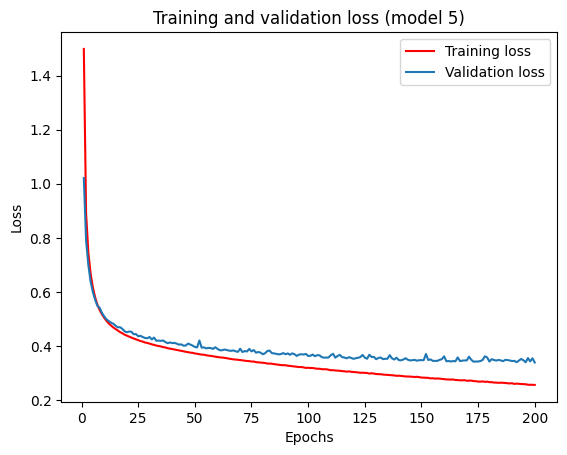

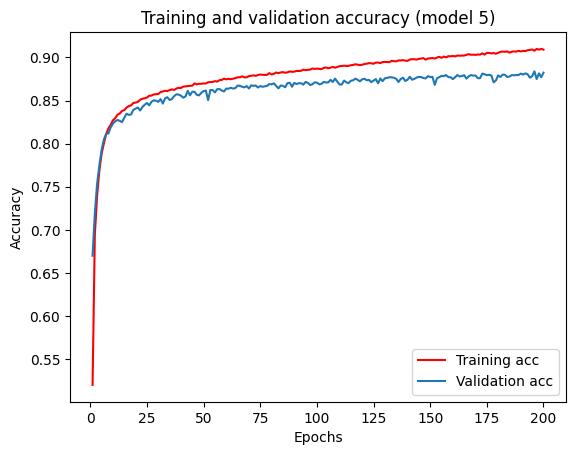

In [70]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №5 попри збільшення в два рази кількості епох, все ще недонавчена.

#### Модель №6. Зменшуємо розмір батчу

Використовуємо за основу модель №2. Зменшимо розмір батчу до 100

In [71]:
# створюємо послідовну модель
model6 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model6.add(Dense(50, input_dim=784, activation='relu'))
model6.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model6.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model6.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [72]:
# виведемо параметри моделі
print(model6.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 50)                39250     
                                                                 
 dense_43 (Dense)            (None, 50)                2550      
                                                                 
 dense_44 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [73]:
history = model6.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
528/528 [==============================] - 2s 2ms/step - loss: 1.2082 - accuracy: 0.6083 - val_loss: 0.7622 - val_accuracy: 0.7468
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: 0.6823 - accuracy: 0.7706 - val_loss: 0.6229 - val_accuracy: 0.7771
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8024 - val_loss: 0.5552 - val_accuracy: 0.8061
Epoch 4/100
528/528 [==============================] - 1s 2ms/step - loss: 0.5318 - accuracy: 0.8172 - val_loss: 0.5231 - val_accuracy: 0.8140
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.8243 - val_loss: 0.5028 - val_accuracy: 0.8201
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 0.4842 - accuracy: 0.8300 - val_loss: 0.4850 - val_accuracy: 0.8235
Epoch 7/100
528/528 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8356 - val_loss: 0.4727 - val_accuracy: 0.8281

In [74]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


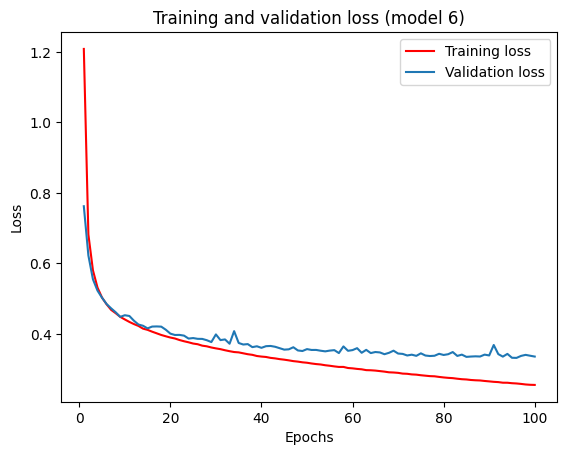

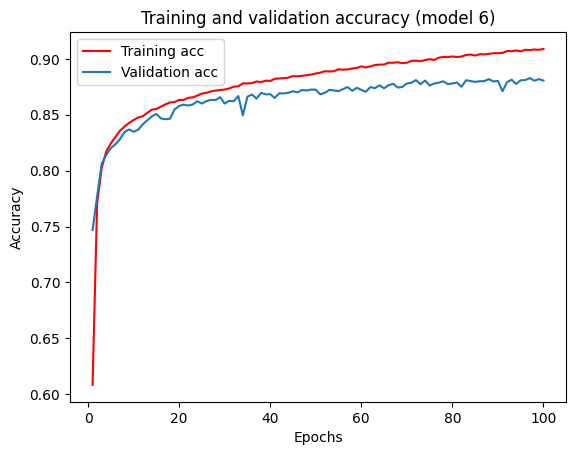

In [75]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №6 все ще недонавчена, але точність дещо збільшилася.

#### Модель №7. Вибір оптимізатора

Використовуємо за основу модель №2

In [76]:
from keras.optimizers import SGD, Adam, RMSprop

# створюємо послідовну модель
model7 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model7.add(Dense(50, input_dim=784, activation='relu'))
model7.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model7.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# Використання оптимізаторів по черзі (у висновках до пункту 7 наведено результати)
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# optimizer = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001)

# компілюємо модель
model7.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [77]:
# виведемо параметри моделі
print(model7.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 50)                39250     
                                                                 
 dense_46 (Dense)            (None, 50)                2550      
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [78]:
history = model7.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
264/264 [==============================] - 2s 5ms/step - loss: 0.6743 - accuracy: 0.7685 - val_loss: 0.4835 - val_accuracy: 0.8289
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8377 - val_loss: 0.4420 - val_accuracy: 0.8421
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.8537 - val_loss: 0.3990 - val_accuracy: 0.8562
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8636 - val_loss: 0.3884 - val_accuracy: 0.8621
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.3531 - accuracy: 0.8717 - val_loss: 0.3774 - val_accuracy: 0.8647
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8763 - val_loss: 0.3509 - val_accuracy: 0.8758
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8808 - val_loss: 0.3467 - val_accuracy: 0.8782

In [79]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


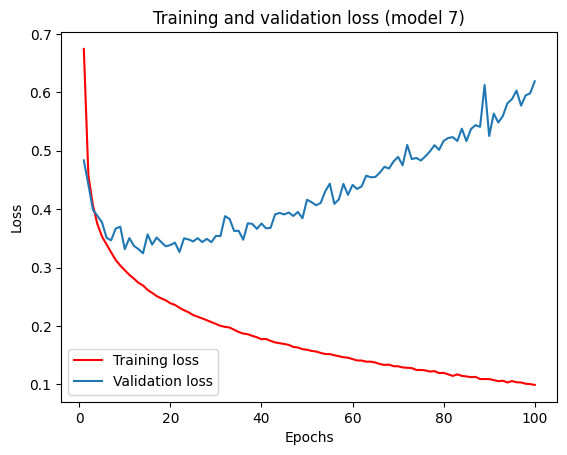

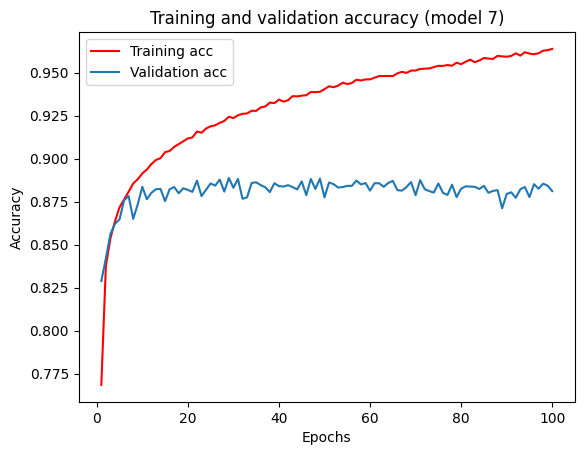

In [80]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 7)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 7)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №7 при використанні різних оптимізаторів:
- SGD - val_accuracy: 0.8830, перенавчання;
- Adam - val_accuracy: 0.8769, перенавчання;
- RMSprop - val_accuracy: 0.8774, перенавчання.

#### Модель №8. Різні техніки регуляризації

Використовуємо за основу модель №2 та L1-регуляризацію, L2-регуляризацію і dropout.


In [81]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

# створюємо послідовну модель
model8 = Sequential()

# L1-регуляризація
# додаємо повнозв'язкові шари нейромережі
# model8.add(Dense(50, input_dim=784, activation='relu', kernel_regularizer=l1(0.001)))
# model8.add(Dense(50, activation='relu', kernel_regularizer=l1(0.001)))
# # input_dim=784 - кількість входів в кожний нейрон
# model8.add(Dense(10, activation='softmax'))
# # тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# L2-регуляризація
# model8.add(Dense(50, input_dim=784, activation='relu', kernel_regularizer=l2(0.001)))
# model8.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
# model8.add(Dense(10, activation='softmax'))

# Dropout
model8.add(Dense(50, input_dim=784, activation='relu'))
model8.add(Dropout(0.5))  # Додати dropout
model8.add(Dense(50, activation='relu'))
model8.add(Dropout(0.5))  # Додати dropout
model8.add(Dense(10, activation='softmax'))

# компілюємо модель
model8.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [82]:
# виведемо параметри моделі
print(model8.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 50)                39250     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_49 (Dense)            (None, 50)                2550      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_50 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [83]:
history = model8.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.12
    )

Epoch 1/100
264/264 [==============================] - 1s 3ms/step - loss: 2.0309 - accuracy: 0.2552 - val_loss: 1.5496 - val_accuracy: 0.5719
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 1.6251 - accuracy: 0.4025 - val_loss: 1.1751 - val_accuracy: 0.6617
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 1.4140 - accuracy: 0.4750 - val_loss: 1.0019 - val_accuracy: 0.6843
Epoch 4/100
264/264 [==============================] - 1s 4ms/step - loss: 1.2860 - accuracy: 0.5155 - val_loss: 0.9036 - val_accuracy: 0.7169
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 1.1995 - accuracy: 0.5503 - val_loss: 0.8434 - val_accuracy: 0.7285
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 1.1375 - accuracy: 0.5700 - val_loss: 0.7966 - val_accuracy: 0.7393
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 1.0838 - accuracy: 0.5932 - val_loss: 0.7591 - val_accuracy: 0.7461

In [84]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


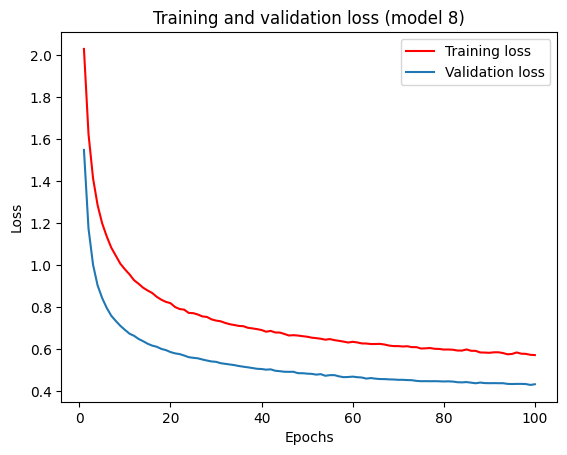

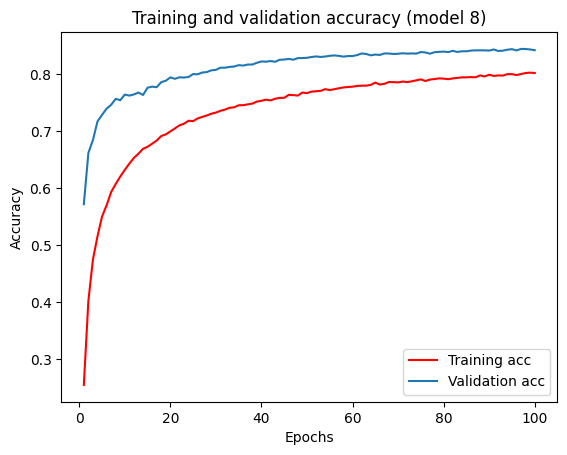

In [85]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 8)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 8)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.
Модель №8 при використанні різних регуляризаторів:
- L1 - val_accuracy: 0.8455;
- L2 - val_accuracy: 0.8765;
- Drop - val_accuracy: 0.8508.

#### Модель №9. Зміна кількох гіперпараметрів одночасно

Результати роботи Моделі №9 наведемо у краткому висновку.

Зміна різних гіперпараметрів і архітектури нейромережі з повнозв'язковими шарами нейронів (Dense) в різних варіаціях не надають точності вище 89%. Робимо висновок, що треба використати нейромережу іншого типу. Далі спробуємо використати нейромережу згорткового типу (Conv2D).





#### Модель №10. Використання моделі згорткового типу

In [93]:
from keras.layers import Conv2D  # клас, який створює згорткові шари
from keras.layers import MaxPooling2D  # клас, який створює шар максимального пулінгу
# Використовується для зменшення розміру представлення та кількості параметрів у мережі, спрощуючи обчислення водночас зберігаючи важливі інформаційні ознаки.
# Наприклад, якщо застосувати MaxPooling2D до зображення з розміром 2x2, результат буде обране максимальне значення з кожного 2x2 блоку пікселів.
# Таким чином, розмір зображення буде зменшений удвічі.
from keras.layers import Flatten  # після використання згорткових шарів та шарів пулінгу,
# зазвичай використовується Flatten, щоб перетворити вихідні дані від цих шарів у вектор,
# який може бути використаний у повнозв'язаних шарах для подальшої обробки та класифікації.

# Підготуємо дані
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Змінення форми даних для згорткових шарів (додаємо третій розмір - кількість каналів)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
# Згорткові шари очікують тривимірний вхід з розмірами (висота, ширина, кількість каналів).
# Таким чином, треба додати один розмір для каналів (у цьому випадку 1, оскільки зображення чорно-білі).
# Отже, після цієї операції форму масиву x_train можна представити як (кількість зображень, 28, 28, 1),
# де останній розмір відповідає кількості каналів (1, оскільки це чорно-білі зображення).
# Це є стандартною формою для зображень у згорткових нейронних мережах.

# Створення моделі з згортковими шарами
model10 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # цей згортковий шар призначений для обробки чорно-білих зображень розміром 28x28,
    # використовуючи 32 фільтри розміром 3x3, та застосовуючи функцію активації ReLU після кожної операції згортки
    MaxPooling2D((2, 2)),
    # максимальний пулінг (2, 2) вибере максимальне значення для кожного 2x2 блоку пікселів та створить нове зображення розміром 2x2.
    # Кожен 2x2 блок перетворюється на одне число, яке є максимальним значенням у цьому блоку.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),  # підготовка даних для застосування повнозв'язкових Dense
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
    ])

# Компіляція моделі
model10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі
model10.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.5227 - accuracy: 0.8079 - val_loss: 0.3679 - val_accuracy: 0.8657
Epoch 2/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3354 - accuracy: 0.8775 - val_loss: 0.3109 - val_accuracy: 0.8857
Epoch 3/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2860 - accuracy: 0.8959 - val_loss: 0.3024 - val_accuracy: 0.8881
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2552 - accuracy: 0.9058 - val_loss: 0.2673 - val_accuracy: 0.9036
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2304 - accuracy: 0.9151 - val_loss: 0.2823 - val_accuracy: 0.8977
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2077 - accuracy: 0.9237 - val_loss: 0.2711 - val_accuracy: 0.9034
Epoch 7/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1888 - accuracy: 0.9302 - val_loss: 0.2907 -

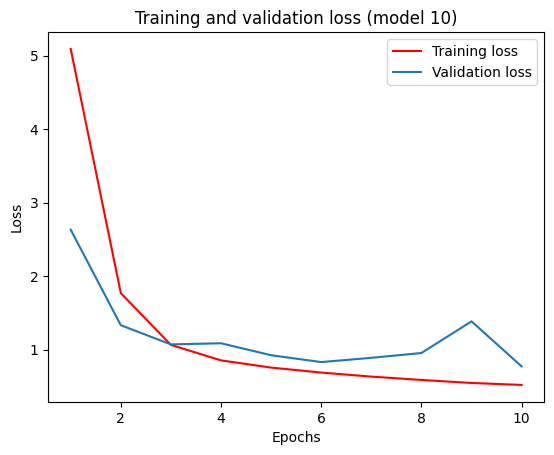

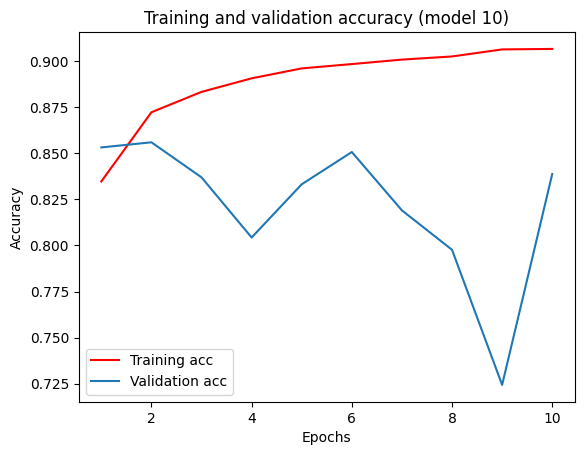

In [94]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 10)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 10)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [95]:
# Оцінка точності на тестових даних
test_loss, test_acc = model10.evaluate(x_train, y_train)
print(f'Test accuracy: {test_acc}')

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1310 - accuracy: 0.9633
Test accuracy: 0.9633499979972839


## Висновки

В цій роботі навчено 9 моделей повнозв'язкового типу з різними гіперпараметрами. Точність цих моделей не перевищує 89%. Для десятої моделі було використано згортковий тип. Такий підхід одразу дав достатній результат 96% точності.